# 1) SIR Model
Let's see an SIR model first, 

The SIR model is one of the simplest compartmental models used in epidemiology to understand and simulate the spread of infectious diseases within a population. It divides the population into three compartments based on their disease status:

Susceptible (S): This compartment represents individuals who are susceptible to the disease, meaning they haven't been infected and can potentially contract the disease if they come into contact with infectious individuals.
Infectious (I): This compartment represents individuals who are infected and can transmit the disease to susceptible individuals.
Recovered (R): This compartment represents individuals who have recovered from the disease and are assumed to be immune, or individuals who have died from the disease and are no longer infectious. In some versions of the model, there might be a separate compartment for deceased individuals.


where:

- $S$, $I$, and $R$ represent the numbers of individuals in the susceptible, infectious, and recovered compartments, respectively.
- $N = S + I + R$ represents the total population size.
- $\beta$ is the effective contact rate of the disease, representing the rate at which susceptible individuals come into contact with infectious individuals and become infected.
- $\gamma$ is the recovery rate of the disease, representing the rate at which infectious individuals recover from the disease and move to the recovered compartment.
- $\frac{dS}{dt}$, $\frac{dI}{dt}$, and $\frac{dR}{dt}$ represent the rates of change of the susceptible, infectious, and recovered compartments over time, respectively.


Model Function

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the model's differential equations
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R  # Total population
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [26]:
def plot_sir(beta, gamma, S0, I0, R0, t):
    solution = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
    S, I, R = solution.T

    # Plot the data
    # Plot the Susceptible
    plt.figure(figsize=(8, 6))
    plt.plot(t, S,'xkcd:azure', label='Susceptible')
    plt.xlabel('Days')
    plt.ylabel('Number of people')
    plt.title('Susceptible individuals over time')
    plt.legend()
    plt.show()

    # Plot the Infected
    plt.figure(figsize=(8, 6))
    plt.plot(t, I,'xkcd:orange', label='Infected')
    plt.xlabel('Days')
    plt.ylabel('Number of people')
    plt.title('Infected individuals over time')
    plt.legend()
    plt.show()

    # Plot the Recovered
    plt.figure(figsize=(8, 6))
    plt.plot(t, R,'xkcd:green', label='Recovered')
    plt.xlabel('Days')
    plt.ylabel('Number of people')
    plt.title('Recovered individuals over time')
    plt.legend()
    plt.show()

Checking the model for some inputs
- 1.1)  Referenced from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3935673/
       <br>We use  the following Inputs
       <br>S0 = 999  (initial susceptible population), I0 = 1(initial infected population), R0 = 0(initial recovered population)
       <br>beta = 0.1 (infection rate),gamma = 0.0667(recovery rate). This means the recovery rate is 1.5 as it is a value that has been applied to previous influenza pandemics and is also near the mean estimate for the 2009 H1N1 pandemic.
- 1.2) S0 = 0.9, I0 = 0.0002, R0 = 0.0998, and parameters β = 2 and γ = 1.4. => S0=9000, I0=2, R0=998
       <br>referenced from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5623938/
- 1.3) Covid-19 parameters β=0.25.,γ=0.05 
       <br>https://www.davidketcheson.info/2020/03/19/SIR_Estimating_parameters.html
<br>R0=beta/gamma

In [32]:
0.17/0.082

2.073170731707317

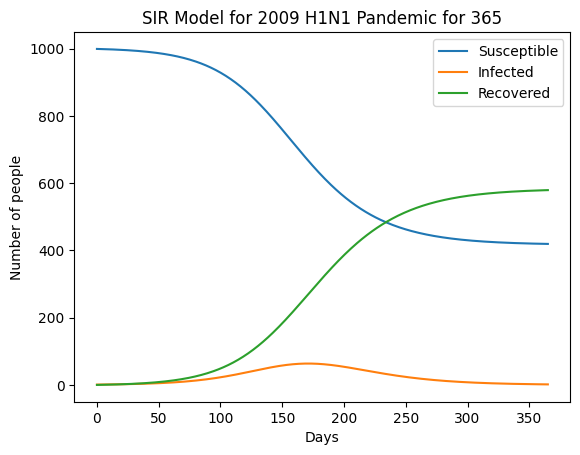

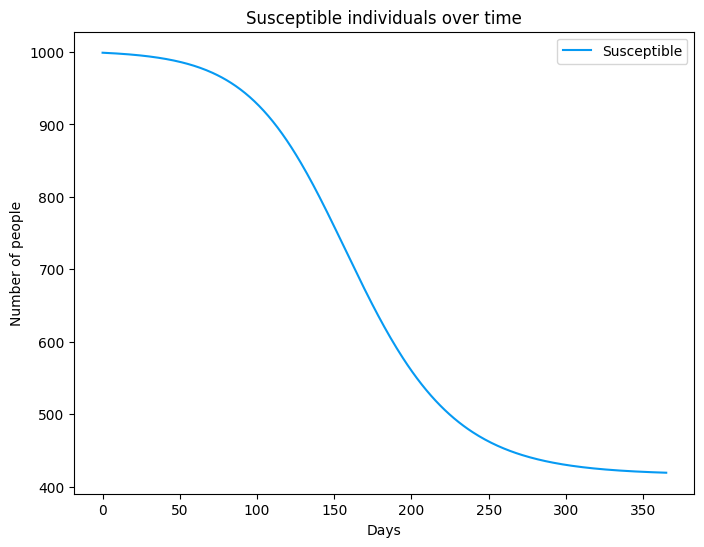

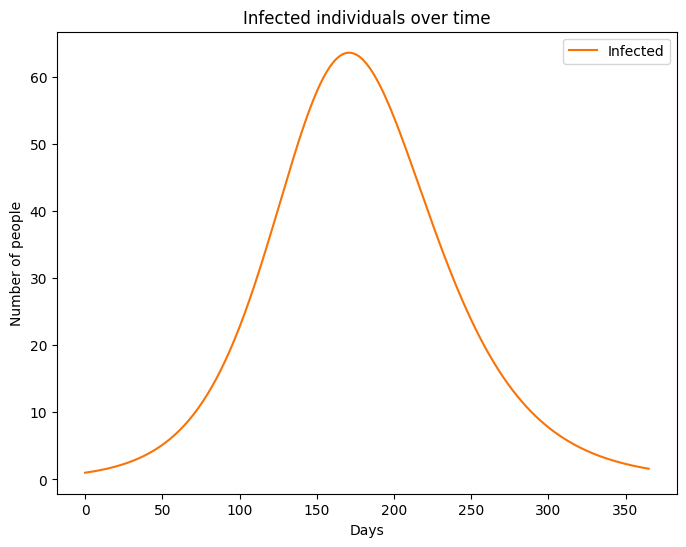

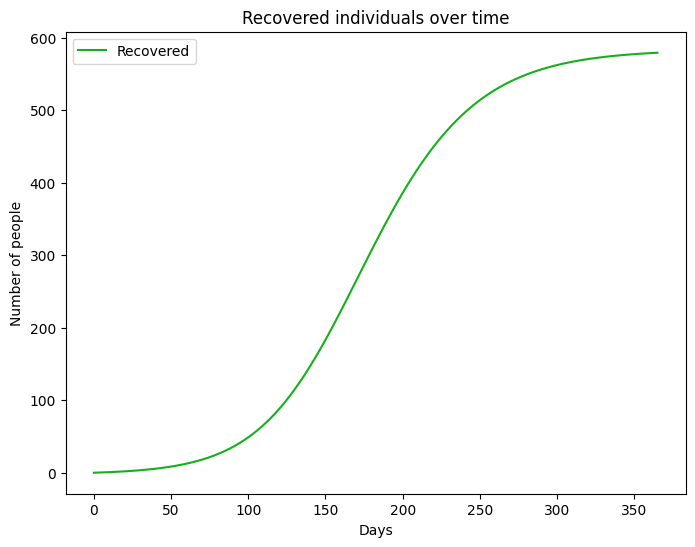

In [27]:
#1.1 
# The parameters used for these plots were N = 1000; β = 0.1; γ = 0.0667
# Initial conditions
S0 = 999  # initial susceptible population
I0 = 1   # initial infected population
R0 = 0    # initial recovered population

# Contact rate and mean recovery rate
beta = 0.1  # infection rate
gamma = 0.0667  # recovery rate
# 0.1; γ = 0.0667; ν = 0.1.
# Time points (in days)
t = np.linspace(0, 365, 365)

# Integrate the SIR equations over time
solution = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
S, I, R = solution.T

# Plot the data
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('SIR Model for 2009 H1N1 Pandemic for 365')
plt.legend()
plt.show()

# Generate the plots of S I R seperately
plot_sir(beta, gamma, S0, I0, R0, t)

In [28]:
print(max(I),np.argmax(I))

63.55236769817387 171


The Output align with the observed dynamics(the referenced paper(Figure 2a)) of a flu pandemic where the infection initially spreads rapidly through a wholly susceptible population, then reaches a peak, and subsequently declines as individuals recover and gain immunity. The time to peak infection is 171 days and the peak infection is 63 people infected and the eventual plateau of recovered individuals would provide insights into the effectiveness of public health interventions and the transmissibility of the disease.

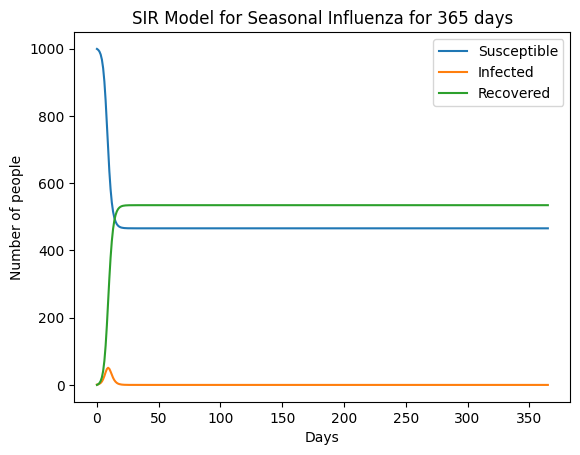

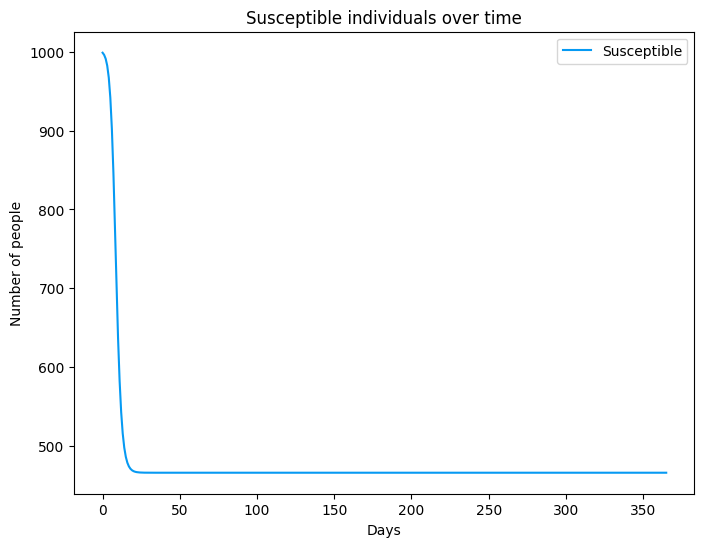

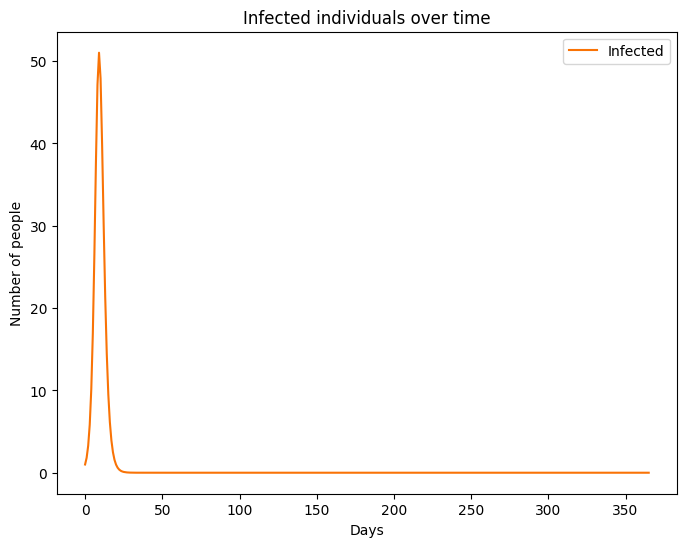

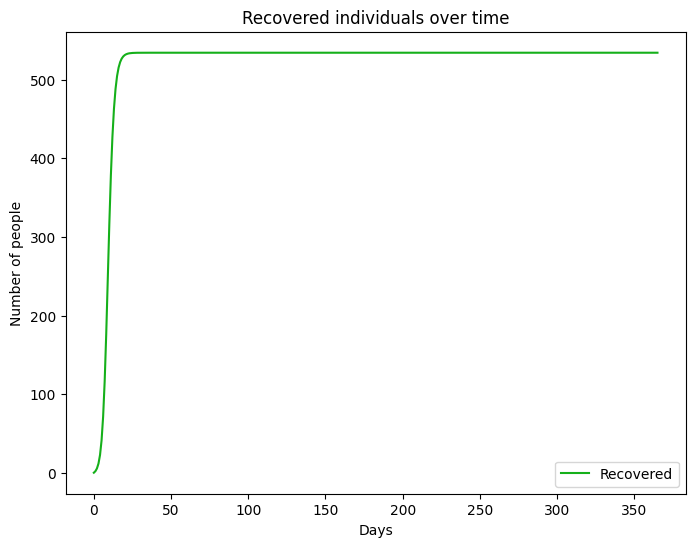

In [29]:
#1.2 Seasonal Influenza
# S0 = 9000  # initial susceptible population
# I0 = 2   # initial infected population
# R0 = 998    # initial recovered population
S0 = 999 
I0 = 1   
R0 = 0  


# Contact rate and mean recovery rate
beta = 2  # infection rate
gamma = 1.4  # recovery rate
# 0.1; γ = 0.0667; ν = 0.1.
# Time points (in days)
t = np.linspace(0, 365, 365)

# Integrate the SIR equations over time
solution = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
S, I, R = solution.T

# Plot the data
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('SIR Model for Seasonal Influenza for 365 days')
plt.legend()
plt.show()

# Generate the plots of S I R seperately
plot_sir(beta, gamma, S0, I0, R0, t)

In [30]:
print(max(I),np.argmax(I))

51.021646618475074 9


The Output align with the observations of a seasonal influenza where the infection spreads with a rapid initial spread, peaking early and sharply. Following the peak(51 infections within 9 days), the infected count quickly declines as the majority recover. After the initial outbreak, the susceptible population stabilizes, and the infection subsides into a steady state with minimal active cases.

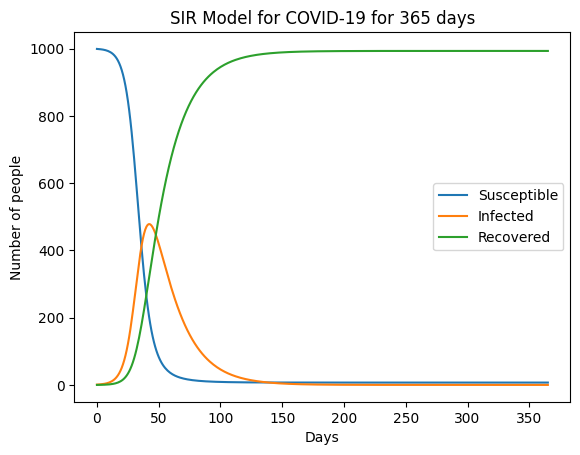

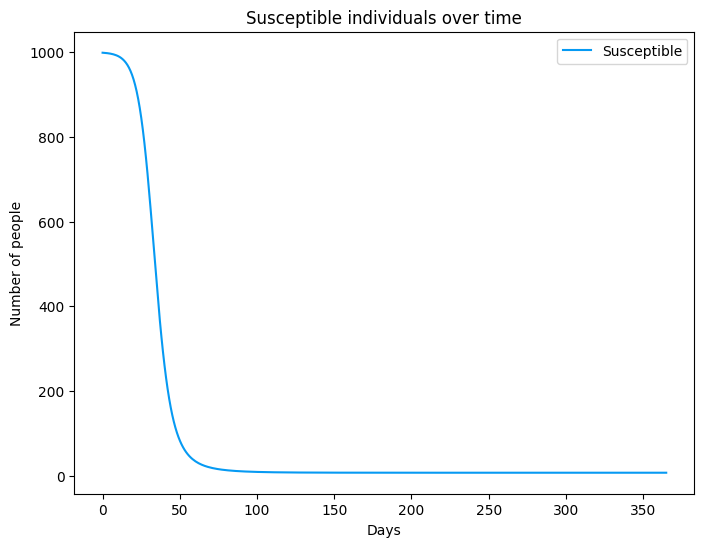

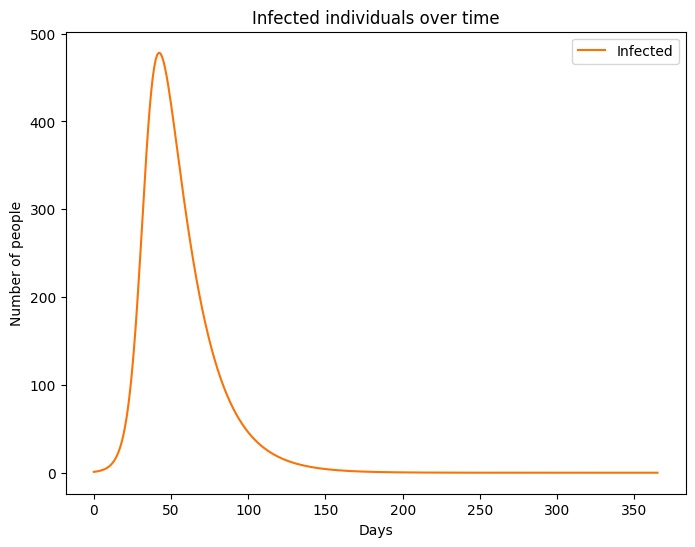

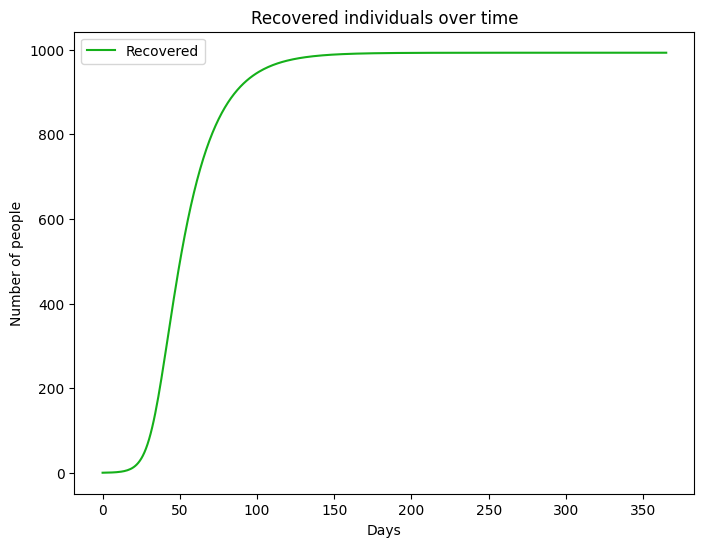

In [31]:
#1.3 COVID 19
# S0 = 9000  # initial susceptible population
# I0 = 2   # initial infected population
# R0 = 998    # initial recovered population
S0 = 999 
I0 = 1   
R0 = 0  

# Contact rate and mean recovery rate
beta = 0.25  # infection rate
gamma = 0.05  # recovery rate
# 0.1; γ = 0.0667; ν = 0.1.
# Time points (in days)
t = np.linspace(0, 365, 365)

# Integrate the SIR equations over time
solution = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
S, I, R = solution.T

# Plot the data
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('SIR Model for COVID-19 for 365 days')
plt.legend()
plt.show()

# Generate the plots of S I R seperately
plot_sir(beta, gamma, S0, I0, R0, t)

In [32]:
print(max(I),np.argmax(I))

478.2532557517694 42


From living throough waves of covid-19,
The average duration of waves can differ significantly. For instance, a study suggested the duration periods of COVID-19 waves were between 91 and 104 days for the first wave and between 110 and 137 days for the second wave in one particular analysis. However, these durations are not universal and can vary based on numerous factors, including government responses, public adherence to guidelines, and the health infrastructure's ability to cope with cases.


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9332615/,
<br>the paper above talks about 3 waves of 45,90,45 days for a region in italy

From our Simple SIR covid model we're getting a spike of spread from 1 infection to 478 within 42 days showing the quick spread and high recovery time. The cases fall post 50 days and pleatau post 120 days which roughly aligns with the wave of covid we experienced.

Covid being as fatal as it was this model doesn't do full justice to it as there was significant mortality associated with it too. Let's try a more complicated model SEIRDV which considers all these factors.

The SEIRDV model is an extension of the traditional SIR model of infectious diseases, which includes compartments for Susceptible (S), Exposed (E), Infected (I), Recovered (R), and Deceased (D), with the addition of Vaccinated (V). It can be used to study the spread of COVID-19 by incorporating the effects of both vaccination and virus exposure over time.
\begin{align*}
\frac{dS}{dt} &= -\frac{\beta S I}{N} + \rho V & \text{(Change in Susceptibles)} \\
\frac{dE}{dt} &= \frac{\beta S I}{N} - \sigma E & \text{(Change in Exposed)} \\
\frac{dI}{dt} &= \sigma E - \gamma I - \mu I & \text{(Change in Infectious)} \\
\frac{dR}{dt} &= \gamma I & \text{(Change in Recovered)} \\
\frac{dV}{dt} &= \alpha S - \rho V & \text{(Change in Vaccinated)} \\
\frac{dD}{dt} &= \mu I & \text{(Change in Deceased)}
\end{align*}


The SEIRDV model consists of the following differential equations:
\begin{align}
\frac{dS}{dt} &= -\frac{\beta S I}{N} + \rho V, & \text{where $\frac{dS}{dt}$ is the rate of change of susceptible individuals.} \\
\frac{dE}{dt} &= \frac{\beta S I}{N} - \sigma E, & \text{where $\frac{dE}{dt}$ is the rate of change of exposed individuals.} \\
\frac{dI}{dt} &= \sigma E - \gamma I - \mu I, & \text{where $\frac{dI}{dt}$ is the rate of change of infectious individuals.} \\
\frac{dR}{dt} &= \gamma I, & \text{where $\frac{dR}{dt}$ is the rate of change of recovered individuals.} \\
\frac{dV}{dt} &= \alpha S -\rho V, & \text{where $\frac{dV}{dt}$ is the rate of change of vaccinated individuals.} \\
\frac{dD}{dt} &= \mu I, & \text{where $\frac{dD}{dt}$ is the rate of change of deceased individuals.}
\end{align}
Parameters:
- $\beta$ is the effective contact rate.
- $\sigma$ is the rate at which exposed individuals become infectious.
- $\gamma$ is the recovery rate of infectious individuals.
- $\mu$ is the mortality rate for infected individuals.
- $\rho$ is the rate at which vaccination reduces the susceptible population.
- $\alpha$  is the vaccination rate 
- $N$ is the total population excluding deceased individuals.

These equations model the spread of COVID-19 and the effects of vaccination and mortality.
The SEIRDV model can be highly beneficial for studying COVID-19 due to its comprehensive structure that includes various stages of the disease and the effects of vaccination.

https://www.nature.com/articles/s41598-020-67459-8  generic modelling reference

https://como-dtc-collaboration.github.io/como-models/articles/SEIRDV.html  seirdv model reference

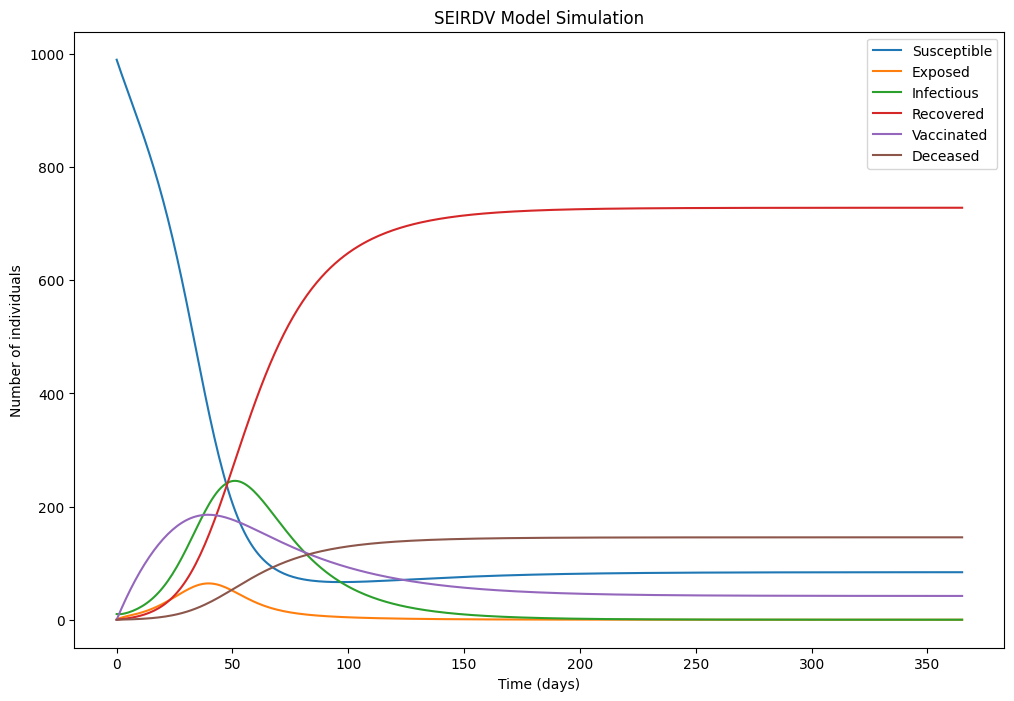

In [36]:
# Define the model
def seirdv_model_with_vaccination(y, t, beta, sigma, gamma, mu, rho, alpha):
    S, E, I, R, V, D = y
    N = S + E + I + R + V  # Total population, excluding deceased for the model dynamics

    # New infections
    new_infections = (beta * S * I) / N

    # Model equations
    dS_dt = -new_infections - alpha * S + rho * V  # Susceptibles
    dE_dt = new_infections - sigma * E             # Exposed
    dI_dt = sigma * E - gamma * I - mu * I         # Infectious
    dR_dt = gamma * I                              # Recovered
    dV_dt = alpha * S - rho * V                    # Vaccinated
    dD_dt = mu * I                                 # Deceased

    return dS_dt, dE_dt, dI_dt, dR_dt, dV_dt, dD_dt

# Initial number of individuals in each compartment
S0 = 990
E0 = 0
I0 = 10
R0 = 0
V0 = 0
D0 = 0
initial_conditions = S0, E0, I0, R0, V0, D0

# Contact rate, beta; mean incubation period, sigma; mean recovery rate, gamma; death rate, mu; vaccination rate, rho
beta = 0.25 #From SIR covid model cited paper
sigma = 0.3 # https://coronavirus.jhu.edu/region/united-states (infected/Uspopulation)
gamma = 0.05 #from SIR covid model cited paper
mu = 0.01 # https://coronavirus.jhu.edu/region/united-states based on us covid stats  (deaths/infected for US)
rho = 0.02 # Assumption is arbitrary (1/50 -> assuming vaccines wear off in 50 days) 
alpha= 0.01 # random vaccination rate

# Time vector for the simulation
t = np.linspace(0, 365, 365)  # Simulate for 365 days

# Integrate the SEIRDV equations over the time grid t
alpha_values = [0.0, 0.01, 0.05, 0.1]  # Different vaccination rates

plt.figure(figsize=(10, 6))

for alpha in alpha_values:
    results = odeint(seirdv_model_with_vaccination, initial_conditions, t, args=(beta, sigma, gamma, mu, rho, alpha))
    plt.plot(t, results[:, 5], label=f'Alpha = {alpha}')  # Plot deaths

plt.title('Impact of Vaccination Rate on Deaths')
plt.xlabel('Days')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(t, results[:, 0], label='Susceptible')
plt.plot(t, results[:, 1], label='Exposed')
plt.plot(t, results[:, 2], label='Infectious')
plt.plot(t, results[:, 3], label='Recovered')
plt.plot(t, results[:, 4], label='Vaccinated')
plt.plot(t, results[:, 5], label='Deceased')

plt.title('SEIRDV Model Simulation')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

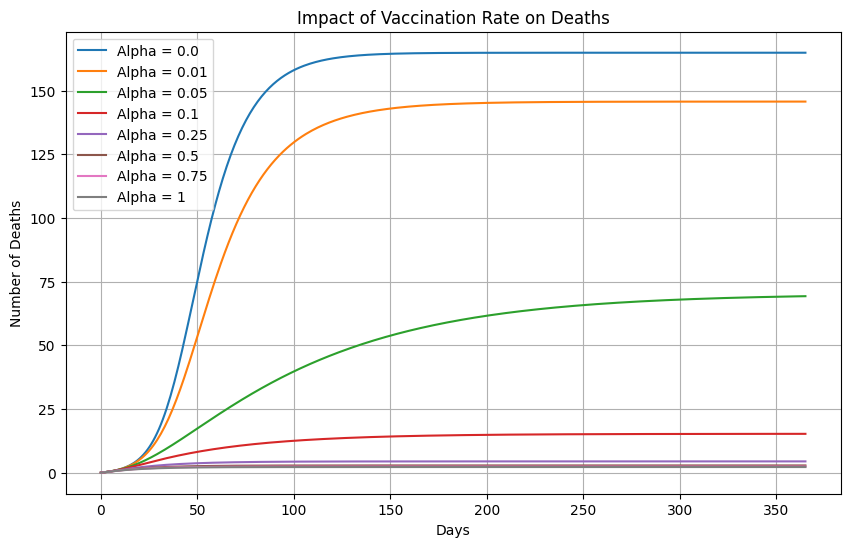

In [37]:
alpha_values = [0.0, 0.01, 0.05, 0.1,0.25, 0.5, 0.75 ,0.8]  # Different vaccination rates

plt.figure(figsize=(10, 6))

for alpha in alpha_values:
    results = odeint(seirdv_model_with_vaccination, initial_conditions, t, args=(beta, sigma, gamma, mu, rho, alpha))
    plt.plot(t, results[:, 5], label=f'Alpha = {alpha}')  # Plot deaths

3plt.title('Impact of Vaccination Rate on Deaths')
plt.xlabel('Days')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Intro and overview
#SIR model and applications with citations
#SIR 3 Scenarios and interpretations and comparisons
#seirdv_model_with_vaccination interpretation,
# how vaccination affects ...
# SIR VS seirdv_model_with_vaccination for COVID-19 comparisons
#Conclusions -> good things from study, scope of work to mitigate issues with selecting statornary (constant parameterS) 
#citations 